In [145]:
#import necessary libraries
import pandas as pd
import numpy as np
import re

In [146]:
#reading or opening the dataset
df = pd.read_excel('productdata.xlsx')


In [147]:
#having a glance of what the dataset looks like by printing first 5 rows
df.head()

,PRODUCTID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCTTYPEID,ProductLength
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650.0,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755.0,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537.0,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996.0,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112.0,598.424000


In [148]:
#replacing spaces with _ for column names seperated with a space
df.columns = df.columns.str.replace(' ', '_')

In [149]:
print(df.columns)

Index(['PRODUCTID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION', 'PRODUCTTYPEID',
       'ProductLength'],
      dtype='object')


In [150]:
#renaming column names appropriately
Columns = df.rename(columns={
    'PRODUCTID': 'PRODUCT_ID',
    'PRODUCTTYPEID': 'PRODUCT_TYPE_ID',
    'ProductLength': 'PRODUCT_LENGTH'
}, inplace=True)


In [151]:
### Step 3: Handle Missing Values

In [152]:
#print out the columns to ensure it effects
df.columns

Index(['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH'],
      dtype='object')

In [153]:
df

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650.0,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755.0,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537.0,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996.0,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112.0,598.424000
...,...,...,...,...,...,...
3842,67078,Occupational Health and Safety: International ...,NaN,NaN,6232.0,598.000000
3843,653247,Le duel introuvable,NaN,NaN,1.0,539.369000
3844,1783479,"ArtToFrames 27x39 Inch Black Picture Frame, Th...",[Comes with 060 Plexi Glass and a a wire hangi...,This black satin frame is our favorite gallery...,1590.0,2900.000000
3845,770603,The Ascension of Isaiah: translated from the E...,NaN,NaN,6104.0,550.000000


In [154]:
df = df.drop_duplicates() #drop duplicates

In [155]:
#handle missing values

In [156]:
df["DESCRIPTION"].fillna("No Description", inplace=True)
df["BULLET_POINTS"].fillna("No Bullet Points", inplace=True)

<ipython-input-156-a5a90c78a6d2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["DESCRIPTION"].fillna("No Description", inplace=True)
<ipython-input-156-a5a90c78a6d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DESCRIPTION"].fillna("No Description", inplace=True)
<ipython-input-156-a5a90c78a6d2>:2: FutureWarning: A value is tryin

In [157]:
# Convert columns to appropriate data types
df["PRODUCT_ID"] = pd.to_numeric(df["PRODUCT_ID"], errors="coerce")
df["PRODUCT_TYPE_ID"] = pd.to_numeric(df["PRODUCT_TYPE_ID"], errors="coerce")
df["PRODUCT_LENGTH"] = pd.to_numeric(df["PRODUCT_LENGTH"], errors="coerce")

<ipython-input-157-a6b6563b49f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PRODUCT_ID"] = pd.to_numeric(df["PRODUCT_ID"], errors="coerce")
<ipython-input-157-a6b6563b49f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PRODUCT_TYPE_ID"] = pd.to_numeric(df["PRODUCT_TYPE_ID"], errors="coerce")
<ipython-input-157-a6b6563b49f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [158]:
# Remove rows with missing product IDs
df = df.dropna(subset=["PRODUCT_ID"])

In [159]:
# Standardize text columns
df["TITLE"] = df["TITLE"].str.strip().str.title()
df["DESCRIPTION"] = df["DESCRIPTION"].str.strip()
df["BULLET_POINTS"] = df["BULLET_POINTS"].astype(str).str.strip()

In [160]:
# Handle outliers in ProductLength
q1 = df["PRODUCT_LENGTH"].quantile(0.25)
q3 = df["PRODUCT_LENGTH"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df["PRODUCT_LENGTH"] >= lower_bound) & (df["PRODUCT_LENGTH"] <= upper_bound)]

In [161]:
df

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",No Description,2755.0,393.700000
2,2765088,Priknik Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537.0,748.031495
3,1594019,Alishah Women'S Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996.0,787.401574
4,283658,The United Empire Loyalists: A Chronicle Of Th...,No Bullet Points,No Description,6112.0,598.424000
5,2152929,Hins Metal Bucket Shape Plant Pot For Indoor &...,"[Simple and elegant, great for displaying indo...",HINS Brings you the most Elegant Looking Pot w...,5725.0,950.000000
...,...,...,...,...,...,...
3536,14245,Viper,No Bullet Points,No Description,123.0,437.007000
3559,322001,"The Impending Fate Of Trinity College, Dublin,...",No Bullet Points,No Description,6104.0,614.000000
3560,773612,21 Heroã­Nas Negras Excepcionais: Histã³Ria De...,No Bullet Points,No Description,36.0,598.000000
3561,801695,Spider Dance,No Bullet Points,No Description,837.0,550.000000


In [162]:
df.head(3)

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",No Description,2755.0,393.700000
2,2765088,Priknik Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537.0,748.031495
3,1594019,Alishah Women'S Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996.0,787.401574


In [163]:
missing_values = df.isnull().sum()


In [164]:
print(missing_values)

PRODUCT_ID         0
TITLE              0
BULLET_POINTS      0
DESCRIPTION        2
PRODUCT_TYPE_ID    0
PRODUCT_LENGTH     0
dtype: int64


In [165]:
# Save cleaned data
df.to_excel("cleaned_productdata.xlsx", index=False)

print("Data cleaning complete. Saved as cleaned_productdata.xlsx")

Data cleaning complete. Saved as cleaned_productdata.xlsx


In [166]:
df_cleaned = pd.read_excel("cleaned_productdata.xlsx")  # Cleaned dataset
df_uncleaned = pd.read_excel("productdata.xlsx")  # Uncleaned dataset

In [167]:
df_cleaned.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",No Description,2755,393.700000
1,2765088,Priknik Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
2,1594019,Alishah Women'S Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
3,283658,The United Empire Loyalists: A Chronicle Of Th...,No Bullet Points,No Description,6112,598.424000
4,2152929,Hins Metal Bucket Shape Plant Pot For Indoor &...,"[Simple and elegant, great for displaying indo...",HINS Brings you the most Elegant Looking Pot w...,5725,950.000000


In [168]:
# Initial and final dataset shape
print("Before Cleaning:", df_uncleaned.shape)
print("After Cleaning:", df_cleaned.shape)

Before Cleaning: (3847, 6)
After Cleaning: (3177, 6)


In [169]:
print(df_uncleaned.isnull().sum())


PRODUCTID           0
TITLE               0
BULLET_POINTS    1591
DESCRIPTION      2144
PRODUCTTYPEID     178
ProductLength     178
dtype: int64


In [170]:
print("Missing Values After Cleaning:")
print(df_cleaned.isnull().sum())

Missing Values After Cleaning:
PRODUCT_ID         0
TITLE              0
BULLET_POINTS      0
DESCRIPTION        2
PRODUCT_TYPE_ID    0
PRODUCT_LENGTH     0
dtype: int64


In [171]:
# Summary statistics of numerical columns
print("Descriptive Statistics Before Cleaning:")
print(df_uncleaned.describe())

print("Descriptive Statistics After Cleaning:")
print(df_cleaned.describe())

Descriptive Statistics Before Cleaning:
          PRODUCTID  PRODUCTTYPEID  ProductLength
count  3.847000e+03    3669.000000    3669.000000
mean   1.456557e+06    3932.736986    1150.529020
std    8.666684e+05    3970.908660    2665.897894
min    1.303000e+03       0.000000       1.000000
25%    6.922785e+05     154.000000     507.873000
50%    1.441218e+06    2879.000000     640.000000
75%    2.214798e+06    6337.000000    1023.622046
max    2.999397e+06   13330.000000   96000.000000
Descriptive Statistics After Cleaning:
         PRODUCT_ID  PRODUCT_TYPE_ID  PRODUCT_LENGTH
count  3.177000e+03      3177.000000     3177.000000
mean   1.418176e+06      3778.253069      686.686917
std    8.865916e+05      3990.314233      351.679151
min    1.303000e+03         0.000000        1.000000
25%    6.291510e+05       123.000000      500.000000
50%    1.371534e+06      2842.000000      600.000000
75%    2.206782e+06      6124.000000      850.000000
max    2.999397e+06     13330.000000     1796.0

In [172]:
# Count duplicates
print("Duplicate Rows Before Cleaning:", df_uncleaned.duplicated().sum())
print("Duplicate Rows After Cleaning:", df_cleaned.duplicated().sum())

Duplicate Rows Before Cleaning: 217
Duplicate Rows After Cleaning: 0


In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
info_befor = df_uncleaned.info()
info_after = df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRODUCTID      3847 non-null   int64  
 1   TITLE          3847 non-null   object 
 2   BULLET_POINTS  2256 non-null   object 
 3   DESCRIPTION    1703 non-null   object 
 4   PRODUCTTYPEID  3669 non-null   float64
 5   ProductLength  3669 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 180.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3177 entries, 0 to 3176
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PRODUCT_ID       3177 non-null   int64  
 1   TITLE            3177 non-null   object 
 2   BULLET_POINTS    3177 non-null   object 
 3   DESCRIPTION      3175 non-null   object 
 4   PRODUCT_TYPE_ID  3177 non-null   int64  
 5   PRODUCT_LENGTH   3177 non-null   float64
dtyp

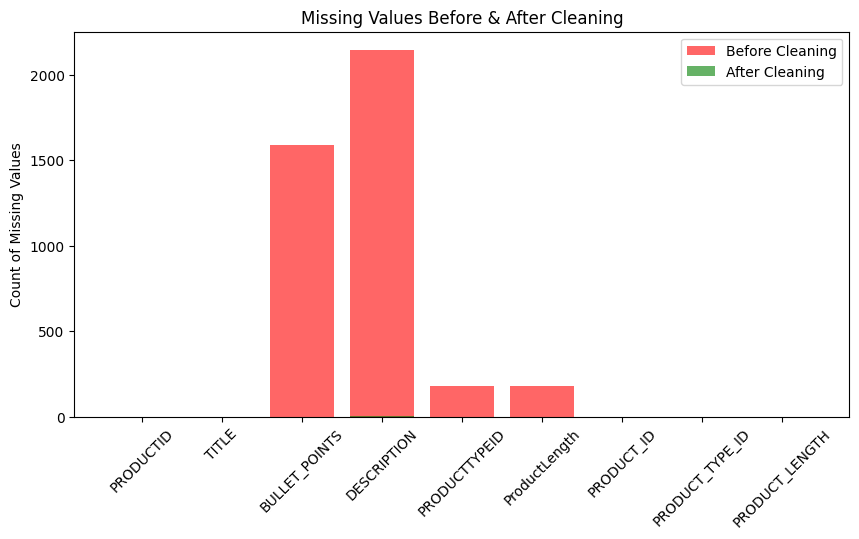

In [175]:

# Missing Values Comparison
missing_before = df_uncleaned.isnull().sum()
missing_after = df_cleaned.isnull().sum()

plt.figure(figsize=(10, 5))
plt.bar(missing_before.index, missing_before.values, color='red', alpha=0.6, label="Before Cleaning")
plt.bar(missing_after.index, missing_after.values, color='green', alpha=0.6, label="After Cleaning")
plt.xticks(rotation=45)
plt.ylabel("Count of Missing Values")
plt.title("Missing Values Before & After Cleaning")
plt.legend()
plt.show()

<ipython-input-176-e79fde50ba1f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Before Cleaning", "After Cleaning"], y=[df_uncleaned.duplicated().sum(), df_cleaned.duplicated().sum()], palette=["red", "green"])


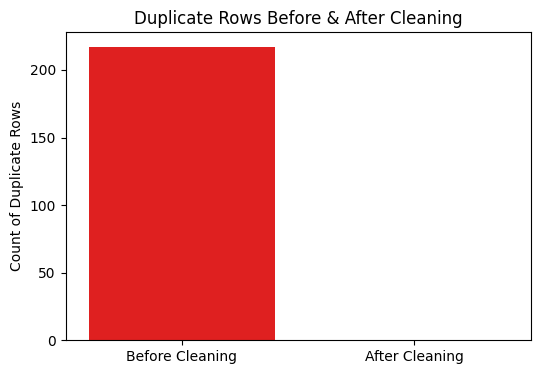

In [176]:
#Duplicate Rows Count
plt.figure(figsize=(6, 4))
sns.barplot(x=["Before Cleaning", "After Cleaning"], y=[df_uncleaned.duplicated().sum(), df_cleaned.duplicated().sum()], palette=["red", "green"])
plt.ylabel("Count of Duplicate Rows")
plt.title("Duplicate Rows Before & After Cleaning")
plt.show()

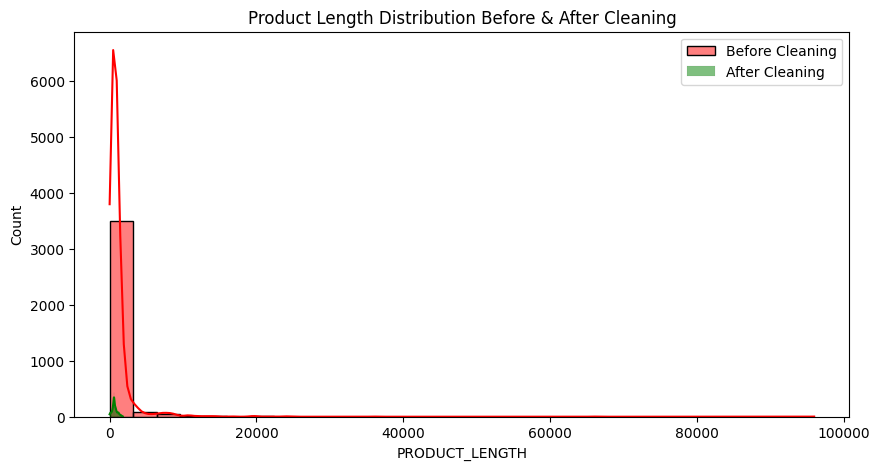

In [177]:
#Product Length Distribution - Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_uncleaned['ProductLength'], bins=30, color='red', alpha=0.5, label="Before Cleaning", kde=True)
sns.histplot(df_cleaned['PRODUCT_LENGTH'], bins=30, color='green', alpha=0.5, label="After Cleaning", kde=True)
plt.xlabel("PRODUCT_LENGTH")
plt.title("Product Length Distribution Before & After Cleaning")
plt.legend()
plt.show()

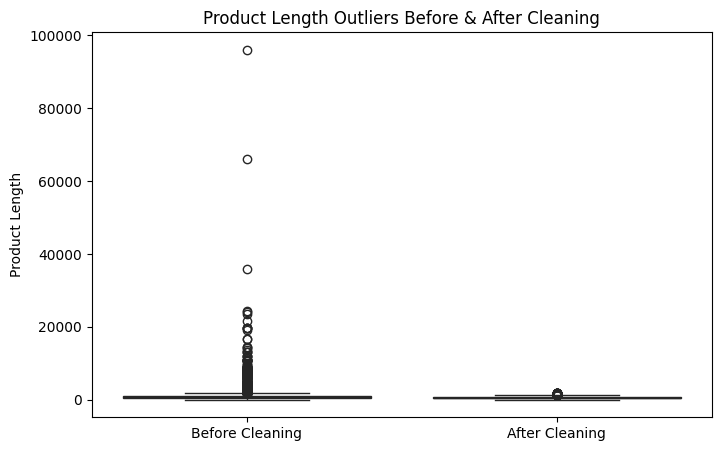

In [178]:
#Product Length - Boxplot (Outliers Check)
plt.figure(figsize=(8, 5))
sns.boxplot(data=[df_uncleaned['ProductLength'].dropna(), df_cleaned['PRODUCT_LENGTH'].dropna()], palette=["red", "green"])
plt.xticks([0, 1], ["Before Cleaning", "After Cleaning"])
plt.ylabel("Product Length")
plt.title("Product Length Outliers Before & After Cleaning")
plt.show()

In [179]:
from google.colab import drive
drive.mount('/content/drive')

df.to_csv('/content/drive/My Drive/cleaned_data.csv', index=False)


Mounted at /content/drive
